# MSc in AI - CE6002 & CS5062


# E-tivity 3: Clustering and Manifold Learning
# Task 3

## Student Name: Mark Murnane
## Student ID: 18195326


## Existing Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

### Visualise the Data Set

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
tf = pd.concat([pd.DataFrame(X, columns=['X1', 'X2']), pd.DataFrame(y, columns=['y'])], axis=1)
tf.head()

,X1,X2,y
0,0.854848,-0.489168,-1
1,-0.813968,0.151072,1
2,-0.200186,0.838167,1
3,0.657888,-0.774318,-1
4,-0.652225,0.451020,1


In [5]:
np.unique(tf['y'].values)

array([-1,  1], dtype=int64)

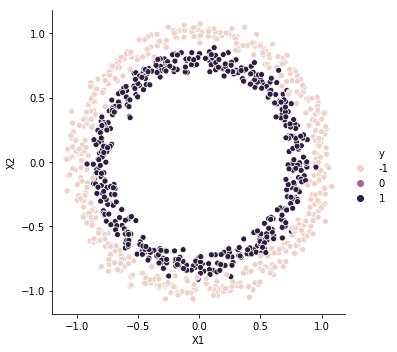

In [6]:
sns.relplot(x='X1', y='X2', hue='y', data=tf)
plt.show()

## Task 3

### Linear Classification Implementation

In [7]:
def calc_error(y_predict, y_actual):
    errors=0
    for x,y in zip(y_predict, y_actual):
        if (x!=y):
            errors+=1;
    return errors/len(y_actual)

In [11]:
class MyLinearClassifier(object):
    
    """Implementation of simple Linear Classification algorithm based on the algorithm outlined
       in Learning from Data, Chapter 3"""
    
    # Simple initialiser to make sure we have a instance variable for weights
    def __init__(self):
        self._weights = np.empty((1,3))

    # Fit function to determine the weights to be used by the classifer
    # This algorithm is based on Learning from Data, p.86 
    def fit(self, X_in, y_in):

        # Add the bias coordinate to the input array
        X = np.hstack((np.ones((X_in.shape[0],1)), X_in))

        # Pseudo-code
        #w = (((X^transpose@X)^-1)X^transpose)@y       

        # Do this the long way for understanding for now
        # Shorthand Xd = np.linalg.pinv(X)
        Xt = np.transpose(X)
        Xd = np.matmul(np.linalg.inv(np.matmul(Xt, X)), Xt)

        self._weights = np.matmul(Xd, y_in)

    # Predicts a set of output classes (y^) based in the input attributes and this model's weights
    def predict(self, X_in):
        X = np.hstack((np.ones((X_in.shape[0],1)), X_in))
        y_hat = np.matmul(X, self._weights)

        return np.sign(y_hat)
        


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [12]:
mlc = MyLinearClassifier()
mlc.fit(X_train, y_train)

y_hat = mlc.predict(X_train)

print(np.unique(y_train, return_counts=True))
print(np.unique(y_hat, return_counts=True))

(array([-1,  1], dtype=int64), array([407, 393], dtype=int64))
(array([-1.,  1.]), array([478, 322], dtype=int64))


In [14]:
e_in = calc_error(y_hat, y_train)
print(e_in)

0.49375


In [18]:
mlc2 = MyLinearClassifier()
mlc2.fit(X, y)

y_hat = mlc.predict(X)

print(np.unique(y, return_counts=True))
print(np.unique(y_hat, return_counts=True))

(array([-1,  1], dtype=int64), array([500, 500], dtype=int64))
(array([-1.,  1.]), array([591, 409], dtype=int64))


### Results

The value of $E_{in}$ demonstrates that simple Linear Classification of the sample cannot be achieved.  The error rate is approaching 50%.  This stands to reason, however, as the scatter plot shows that there is no straight line that could be drawn through the sample space that would not results in 50% of the samples being classified. 